<a href="https://colab.research.google.com/github/Ajay07pandey/Cardiovascular-Risk-Prediction/blob/main/Ajay_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Cardiovascular Risk Prediction
##### **Contribution**    - **Individual**
**Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Capstone project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

In [8]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().any()

id                 False
age                False
education           True
sex                False
is_smoking         False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

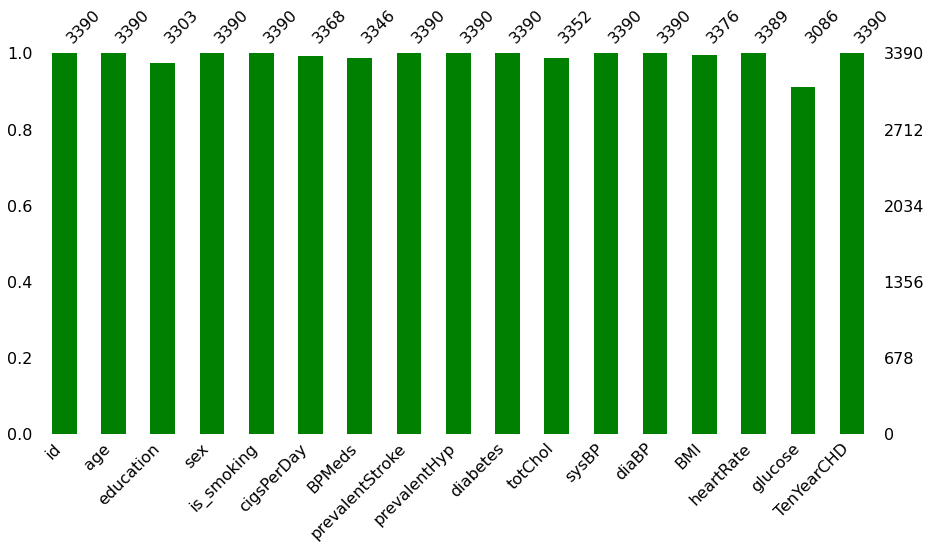

In [10]:
# Visualizing the missing values
msno.bar(df,figsize=(15,7),color = 'green')

### What did you know about your dataset?

1. Data set have **3390 rows** and **17 column**
2. **No duplicate** value in the data set
3. Some missing values are present in **Education,Cigperday,BPmeds,totchol,BMI,heartRate,glucose**

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns[:]

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

1. Sex: male or female ("M" or "F")
2. Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: The level of education of the patient (categorical values - 1,2,3,4)
4. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
5. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
6. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
7. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
8. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
9. Diabetes: whether or not the patient had diabetes (Nominal)
10. Tot Chol: total cholesterol level (Continuous)
11. Sys BP: systolic blood pressure (Continuous)
12. Dia BP: diastolic blood pressure (Continuous)
13. BMI: Body Mass Index (Continuous)
14. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
15. Glucose: glucose level (Continuous)
16. 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# creating a function for unique values
def unique_values():
  for i in df.columns.tolist() :
   print("Unique values in",i,":",df[i].nunique())

In [14]:
unique_values()

Unique values in id : 3390
Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigsPerDay : 32
Unique values in BPMeds : 2
Unique values in prevalentStroke : 2
Unique values in prevalentHyp : 2
Unique values in diabetes : 2
Unique values in totChol : 240
Unique values in sysBP : 226
Unique values in diaBP : 142
Unique values in BMI : 1259
Unique values in heartRate : 68
Unique values in glucose : 132
Unique values in TenYearCHD : 2


Defining 3 lists containing the column names of 
 a. Dependent variables
 b. continuous independent variables
 c. categorical independent variables
 This is defined based on the number of unique values for each attribute

1. Dependent_var = ['TenYearCHD']
2. continuous_var = ['age','cigsperday','totchol','sysbp', 'diabp', 'BMI', 'heartRate', 'glucose']
3. categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

##***3. Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:
1. Distribution of data
2. Outliers in the data

In [16]:
# Dropping the first id column 
df.drop(['id'] , axis = 1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [17]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

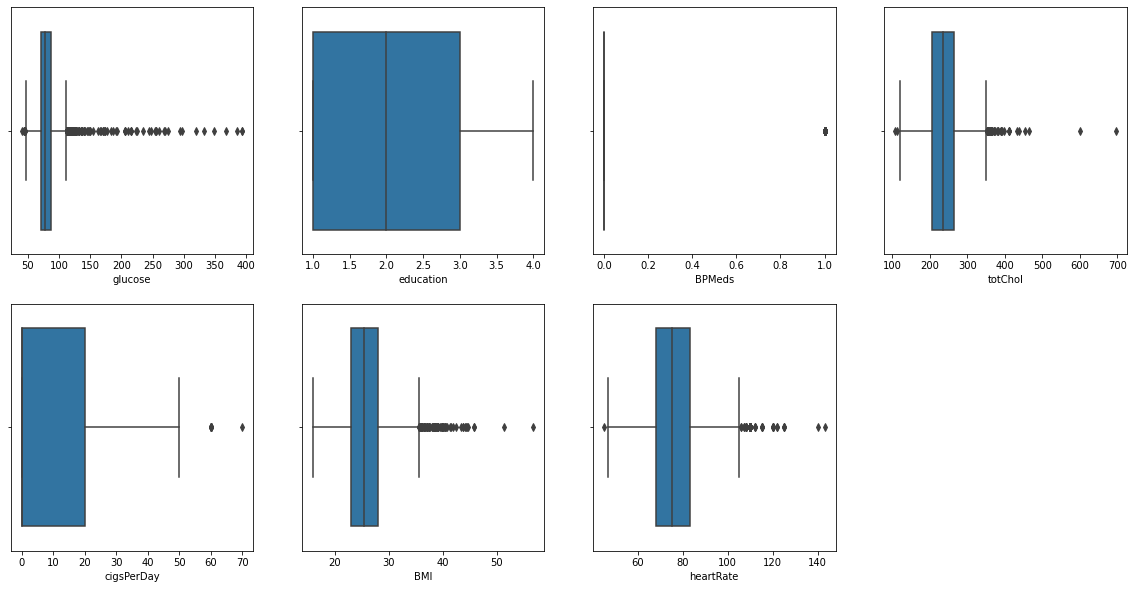

In [18]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(20,10))
for i,j in enumerate(null_list):
  plt.subplot(2,4,i+1)
  sns.boxplot(df[j])
plt.show()
# plt.Figure(figsize=(15,8))
# sns.boxplot(df(null_list))
# # df[null_list].boxplot()

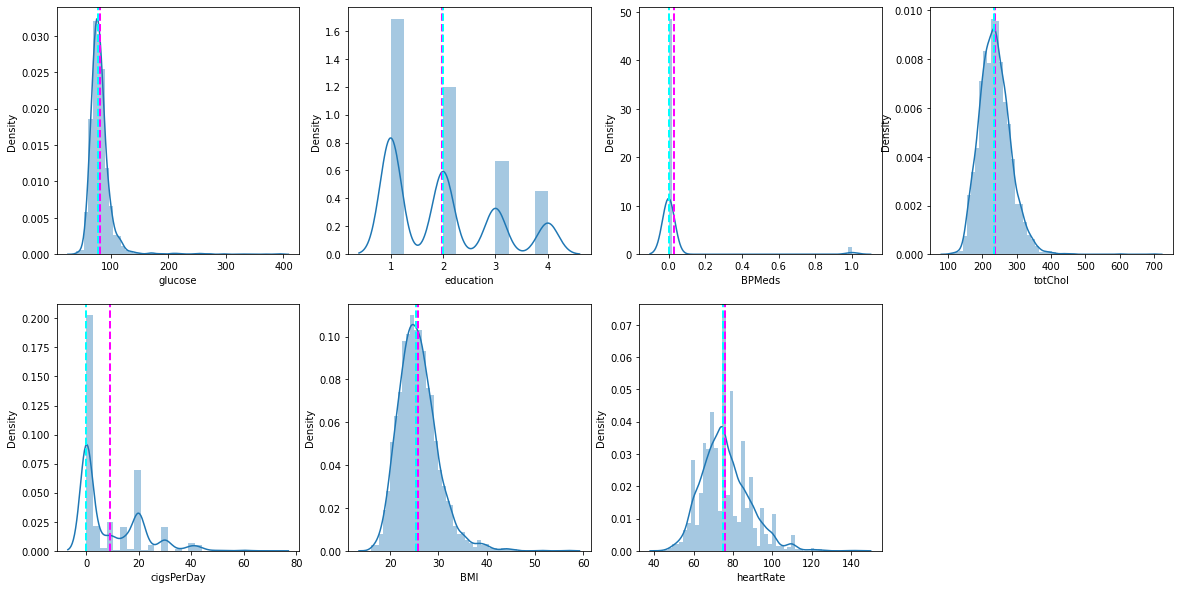

In [19]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,10))
for i,j in enumerate(null_list):
  plt.subplot(2,4,i+1)
  sns.distplot(df[j])
  plt.axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[j].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Median
6. "BMI" -> Median
7. "heartRate" -> Median

In [20]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [21]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Defining 3 lists containing the column names of
1. Dependent variables 
2. continuous independent variables 
3. categorical independent variables 

This is defined based on the number of    unique values for each attribute.

In [22]:
Dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

### What all manipulations have you done and insights you found?

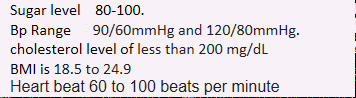

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univeriate**

#### Chart - 1 (TenYearCHD)

In [23]:
type(df['TenYearCHD'])

pandas.core.series.Series

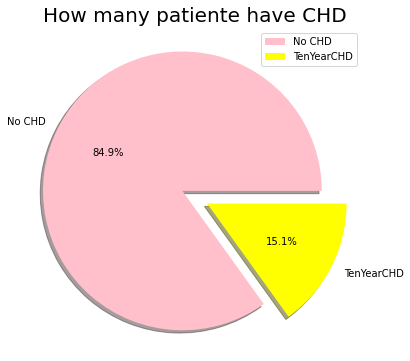

In [24]:
#Plot for dependent variable
labels = 'No CHD' , 'TenYearCHD'
sizes = df.TenYearCHD.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many patiente have CHD",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 (Analysing the distribution of continous variable)

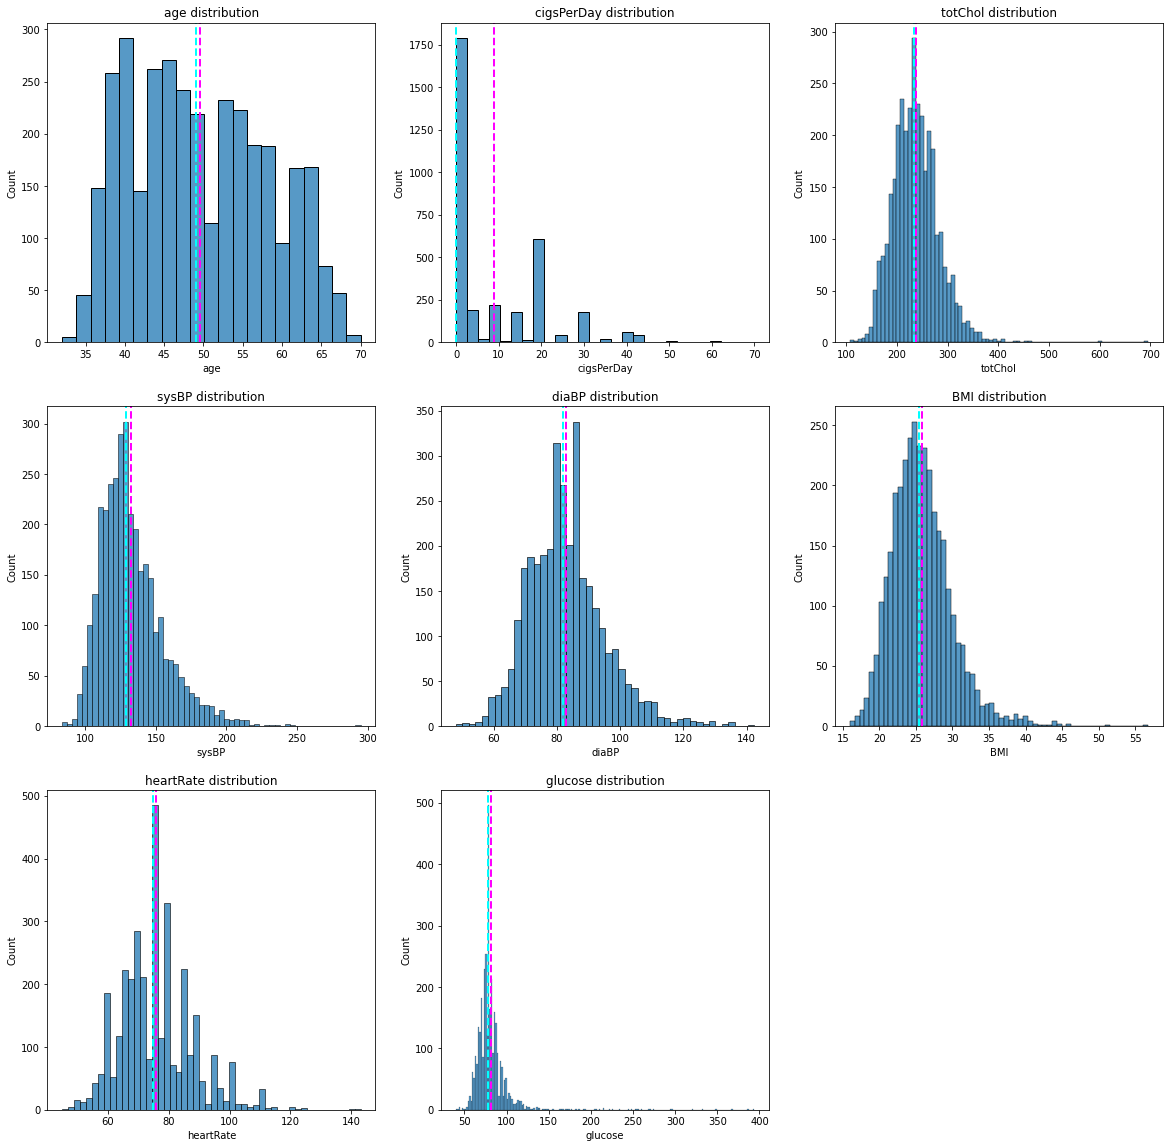

In [25]:
continuous_vard = [ (0 , 'age'), (1 , 'cigsPerDay'),(2 ,'totChol'), (3 , 'sysBP'), (4 ,'diaBP'), (5 , 'BMI'), (6 ,'heartRate'), (7 , 'glucose')]
plt.figure(figsize=(20,20))
for i,j in continuous_vard:
  plt.subplot(3,3,i+1)
  sns.histplot(df[j])
  plt.axvline(df[j].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[j].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(j+' distribution')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3(Analyzing the distribution of the discrete independent variables)

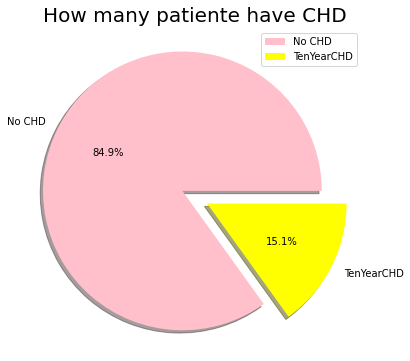

In [26]:
labels = 'No CHD' , 'TenYearCHD'
sizes = df.TenYearCHD.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many patiente have CHD",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)

In [27]:
categorical_vard = [(0,'education'),(1,'sex'), (2,'is_smoking'),(3,'BPMeds'),(4,'prevalentStroke'),(5,'prevalentHyp'),(6,'diabetes')]

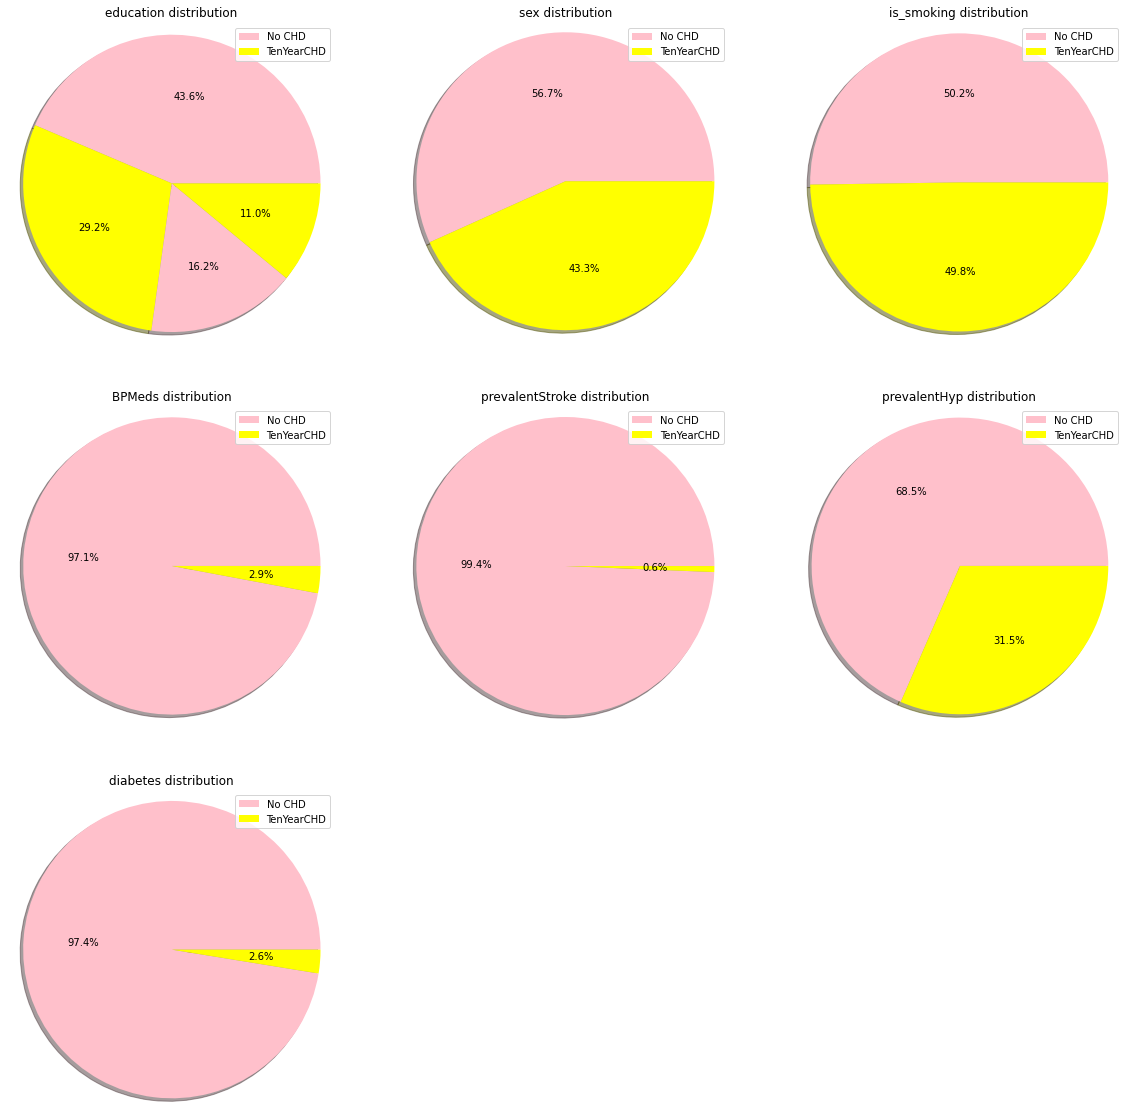

In [28]:
plt.figure(figsize=(20,20))
for i,j in categorical_vard:
   plt.subplot(3,3,i+1)
   sizes = df[j].value_counts()
   colors = ['pink', 'yellow']
   # explode = (0.2, 0.1)
   plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True)
   plt.axis('equal')
   plt.legend( labels, loc="best")
   plt.plot()
   fig=plt.gcf()
   plt.title(j + ' distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Bivariate**

#### Chart - 4(Relation of continous variable with CHD)

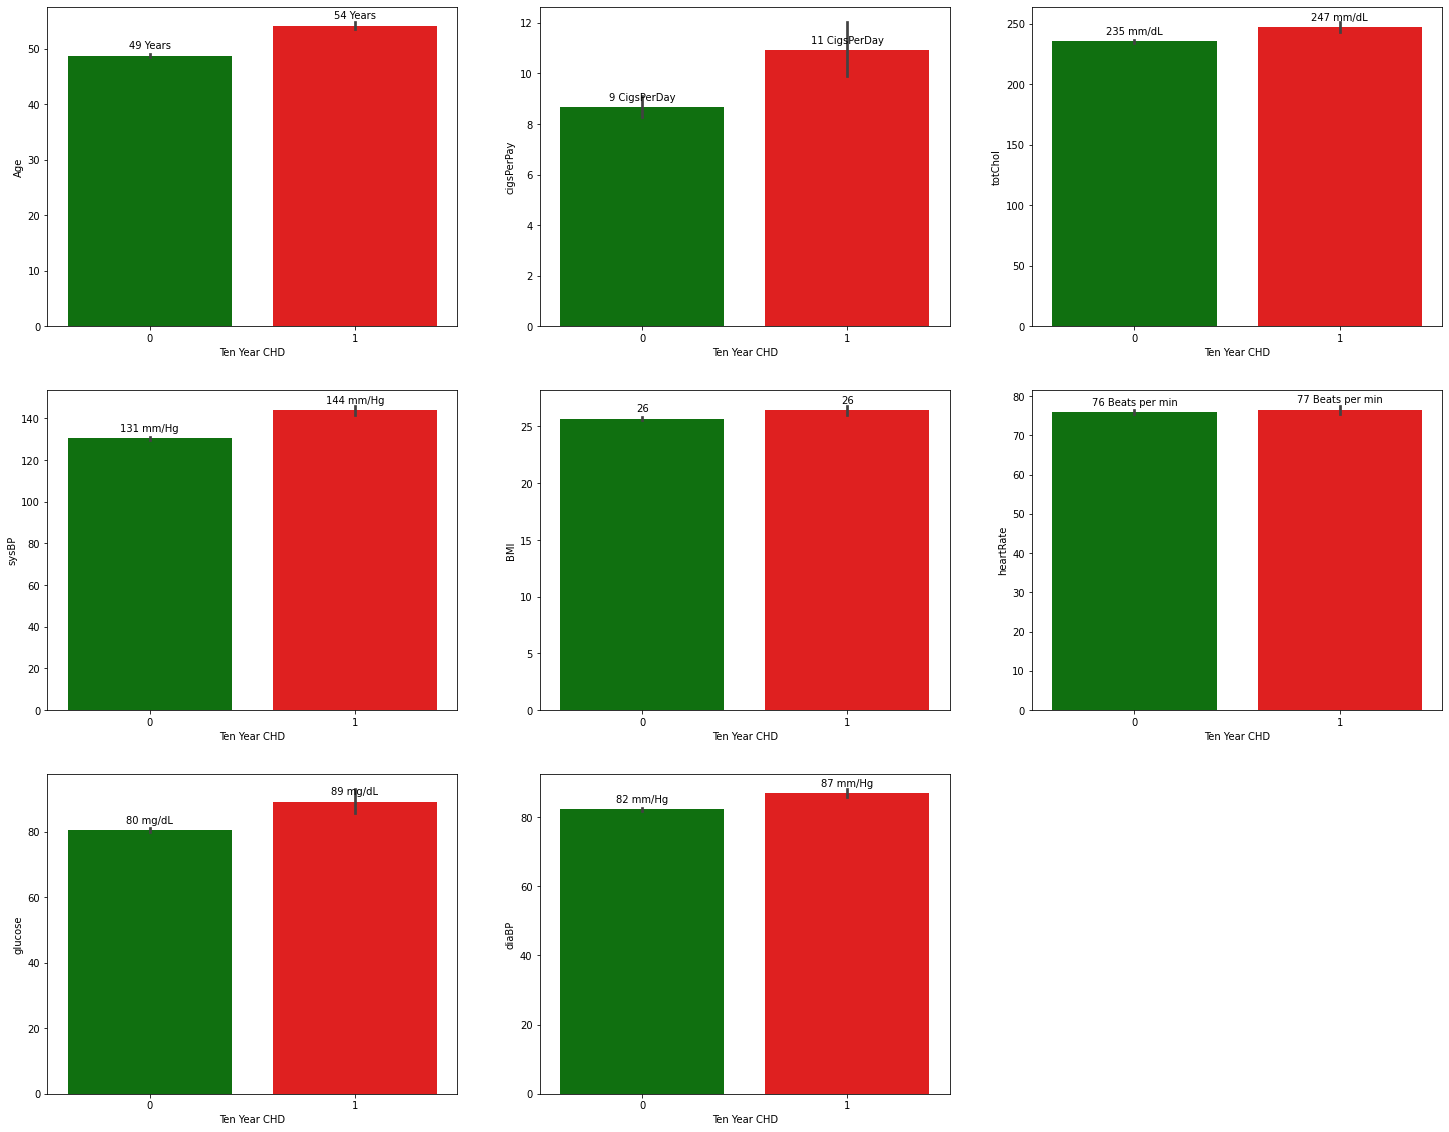

In [29]:
colour = {0: 'green' , 1: 'red'}
plt.figure(figsize=(25,20))

# TenYearCHD vs Age
plt.subplot(3,3,1)
p=sns.barplot(x=df['TenYearCHD'],y=df['age'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('Age')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' Years', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# TenYearCHD vs cigsperday
plt.subplot(3,3,2)
p = sns.barplot(x=df['TenYearCHD'],y=df['cigsPerDay'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('cigsPerPay')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' CigsPerDay', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# TenYearCHD vs totchol
plt.subplot(3,3,3)
p = sns.barplot(x=df['TenYearCHD'],y=df['totChol'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('totChol')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' mm/dL', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# TenYearCHD vs sysbp
plt.subplot(3,3,4)
p = sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('sysBP')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' mm/Hg', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# TenYearCHD vs BMI
plt.subplot(3,3,5)
p = sns.barplot(x=df['TenYearCHD'],y=df['BMI'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('BMI')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# TenYearCHD vs heartRate
plt.subplot(3,3,6)
p = sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('heartRate')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' Beats per min', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# TenYearCHD vs glucose
plt.subplot(3,3,7)
p = sns.barplot(x=df['TenYearCHD'],y=df['glucose'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('glucose')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' mg/dL', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# TenYearCHD vs diabp
plt.subplot(3,3,8)
p = sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],palette = colour)
plt.xlabel('Ten Year CHD')
plt.ylabel('diaBP')
for i in p.patches:
  p.annotate(format(round(i.get_height()),'.0f')+' mm/Hg', (i.get_x() + i.get_width() / 2., i.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5(Analysis for categorical features)

In [30]:
# Chart - 5 visualization code
categorical_var


['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

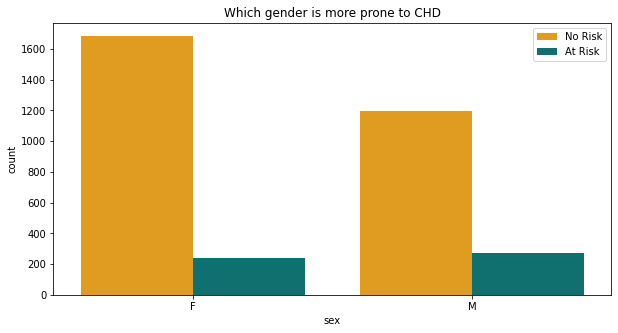

In [31]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,5))
sns.countplot(x = df['sex'], hue=df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6(prevalentStroke vs TenYearCHD)

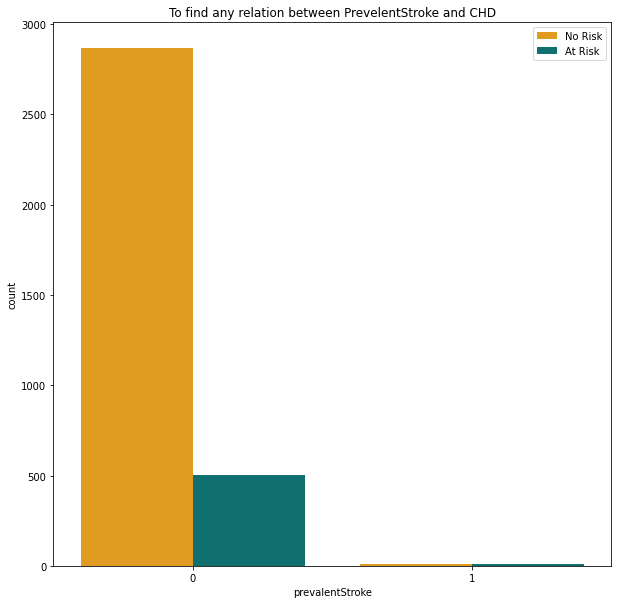

In [32]:
# Chart - 6 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['prevalentStroke'], hue=df['TenYearCHD'], palette = my_palette)
plt.title("To find any relation between PrevelentStroke and CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7( which age group is vulnerable to CHD

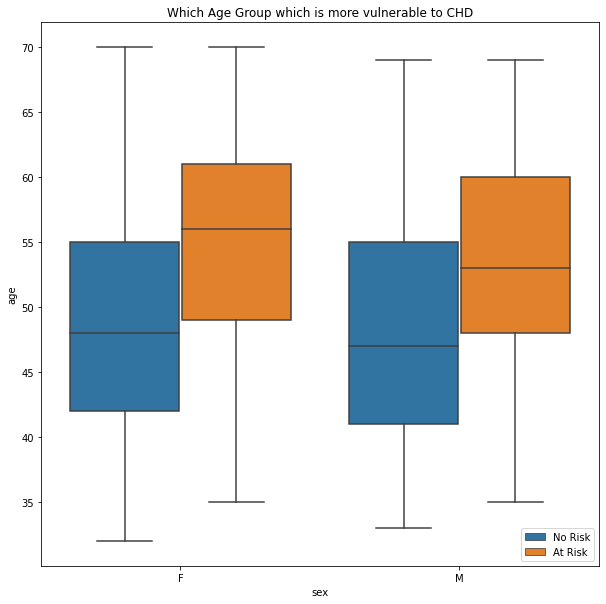

In [33]:
# Chart - 7 visualization code
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'])
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8(Total cholestrol vs CHD)

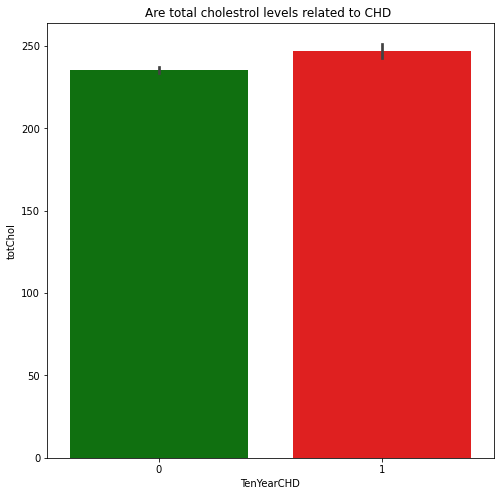

In [34]:
# Chart - 8 visualization code
colour = {0: 'green' , 1: 'red'}
plt.figure(figsize = (8,8))
sns.barplot(df['TenYearCHD'], df['totChol'], palette = colour)
plt.title("Are total cholestrol levels related to CHD ")
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9(HeartRate vs CHD Probablity)

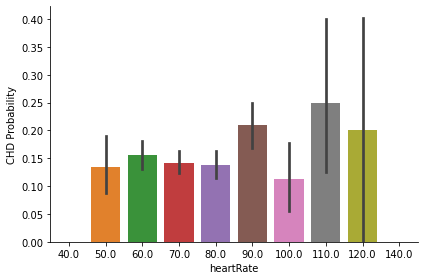

In [35]:
# Chart - 9 visualization code
df['heartRate'] = df['heartRate'].apply(lambda x : 10*(x//10))
ax = sns.factorplot('heartRate', 'TenYearCHD', kind='bar', data = df, size=4, aspect=1.5)
ax.set_ylabels('CHD Probability')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [40]:
# Correlation Heatmap visualization code

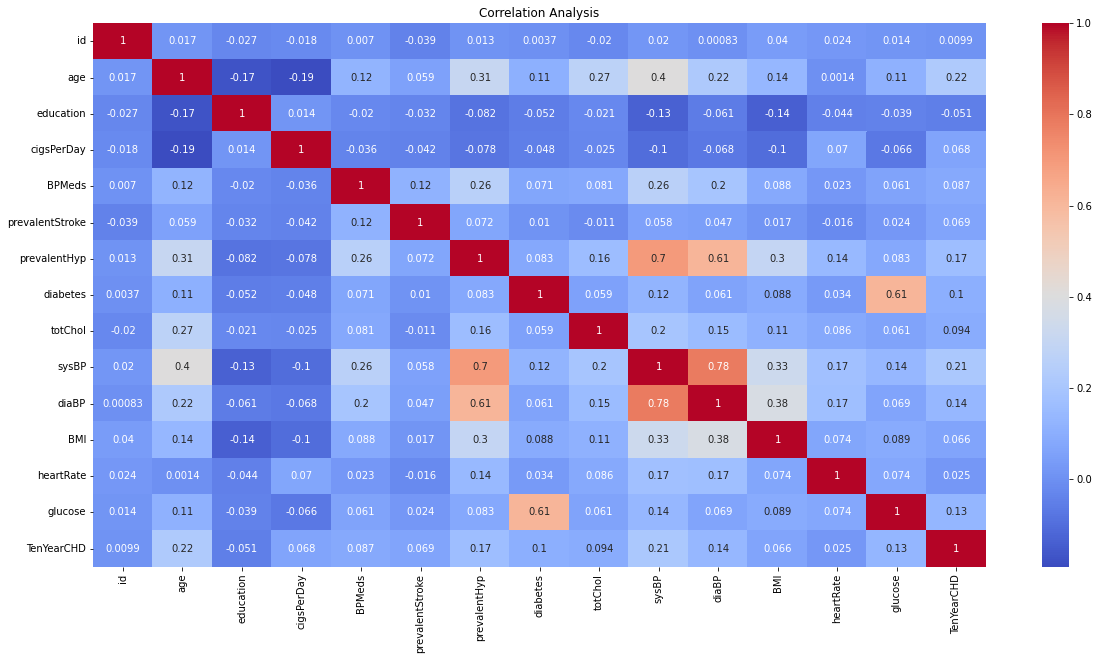

In [41]:
# Correlation magnitude
plt.figure(figsize=(20,10))
plt.title('Correlation Analysis')
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [42]:
# Pair Plot visualization code

<Figure size 720x360 with 0 Axes>

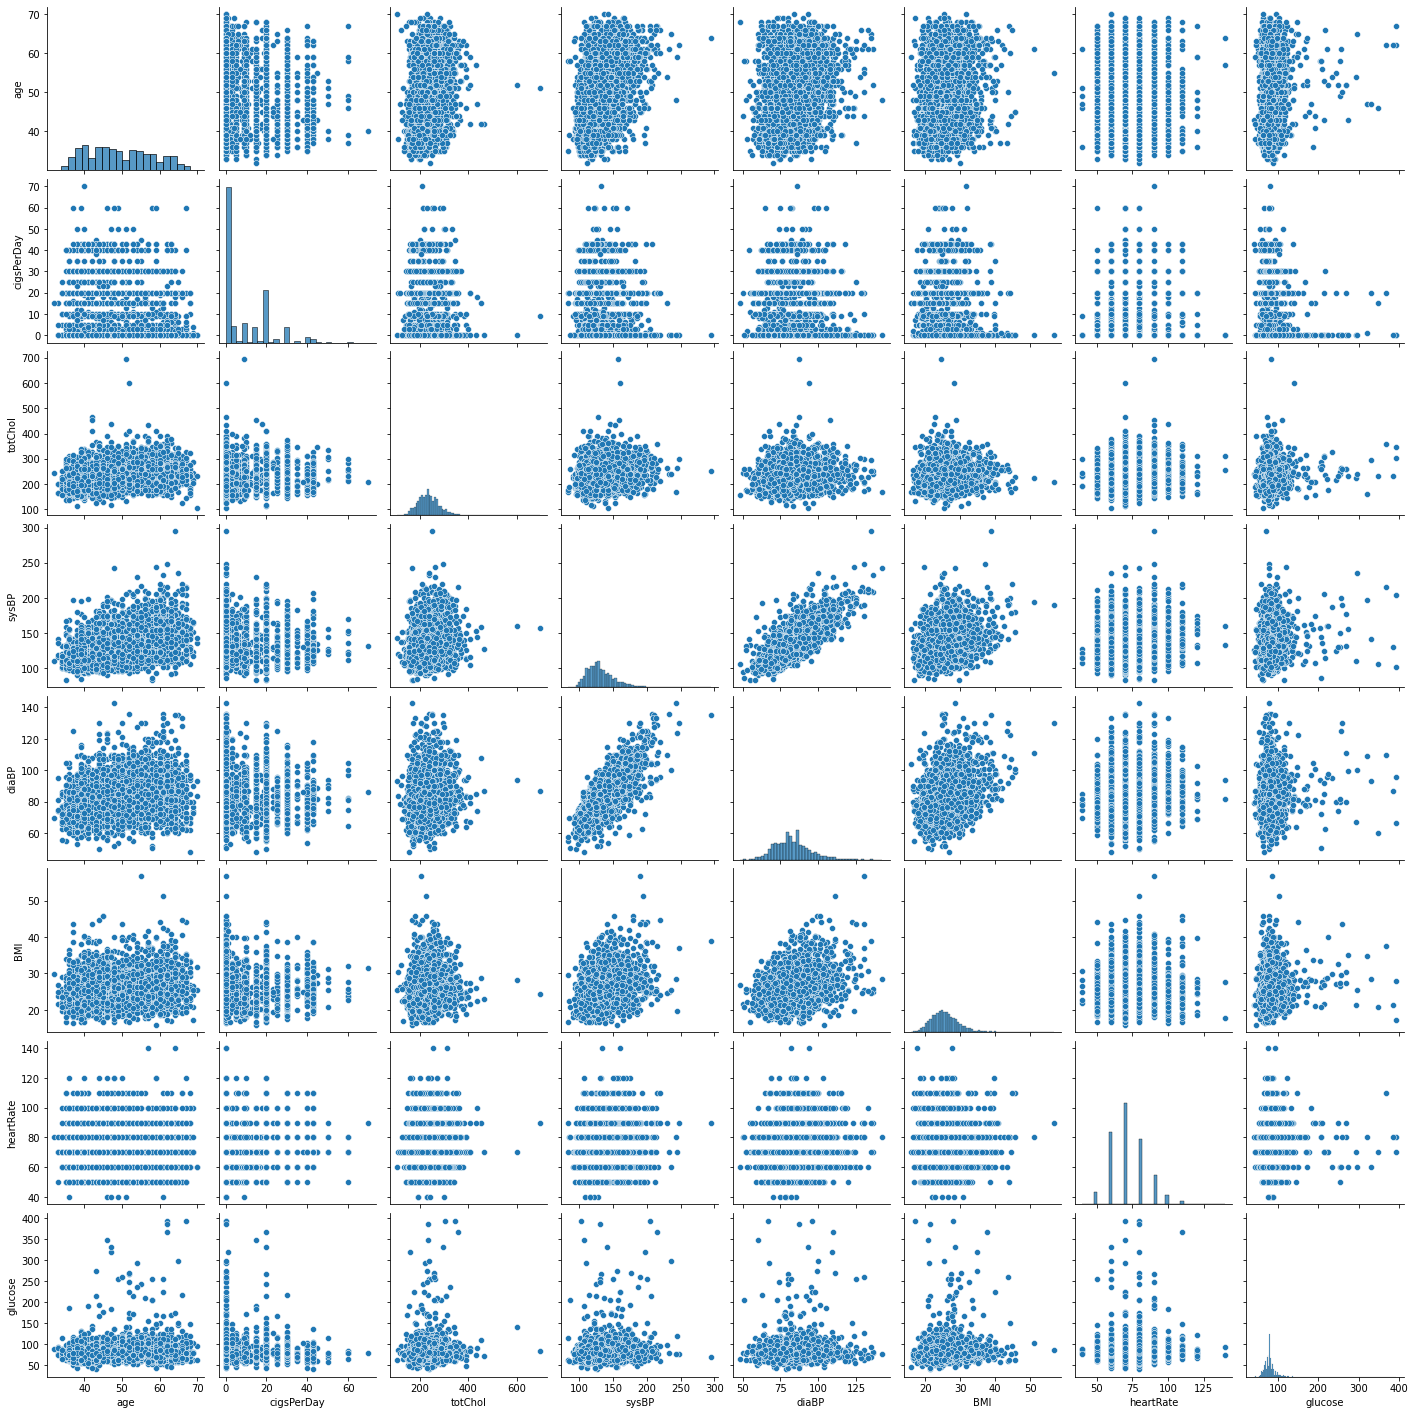

In [43]:
plt.figure(figsize=(10,5))
sns.pairplot(df[continuous_var])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Null Hypothesis = NO relation between education and TenYearCHD

   Alternate Hypothesis = Their is a co relation between education and    TenYearCHD

2. Null Hypothesis = NO relation between PrevelentHyp and TenYearCHD
  
   Alternate Hypothesis = Their is a co-relation between PrevelentHyp and TenYearCHD

3. Null Hypothesis = NO relation between diabetes and prevelentStroke
   
   Alternate Hypothesis = Their is a co-relation between diabetes and prevelentStroke

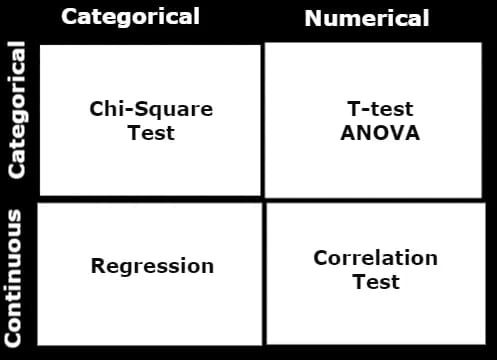

### Hypothetical Statement - 1

> CDF: Cumulative Distribution Function, returns the probability of a value less than or equal to a given outcome.


> PPF: Percent-Point Function, returns a discrete value that is less than or equal to the given probability.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis = NO relation between **education** and **TenYearCHD**

Alternate Hypothesis = Their is a co relation between **education** and **TenYearCHD**

#### 2. Perform an appropriate statistical test.

In [44]:
import scipy.stats
from scipy.stats import chi2

#Now we will create contingency table
ct_table=pd.crosstab(df["TenYearCHD"],df["education"])
print('contingency_table :\n',ct_table)


contingency_table :
 education    1.0  2.0  3.0  4.0
TenYearCHD                     
0           1209  872  479  319
1            269  118   70   54


In [45]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table) 
alpha = 0.05

In [46]:
print(f"chi2 statistic:     {chi2_stat}")
print(f"p-value:            {p:}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     21.400065537300264
p-value:            8.69389071714776e-05
degrees of freedom: 3
expected frequencies:
 [[1255.2100295   840.7699115   466.24513274  316.77492625]
 [ 222.7899705   149.2300885    82.75486726   56.22507375]]


In [47]:
critical_value = chi2.ppf(q = 1 - alpha,df = dof)
print('critical value:',critical_value)


critical value: 7.814727903251179


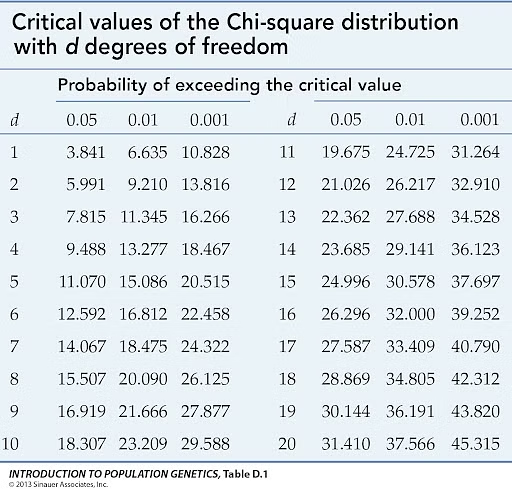

In [48]:
#p-value
p_value = 1- chi2.cdf(x=chi2_stat,df=dof)
print('p-value:',p_value)
if p_value <= alpha:
  print('Reject H0,There is a relationship between education and TenYearCHD')
else:
  print("Accept H0,There is no relationship between education and TenYearCHD")

p-value: 8.693890717148545e-05
Reject H0,There is a relationship between education and TenYearCHD


##### Which statistical test have you done to obtain P-Value?

We have done **chi2 test** to get the P-Value 

##### Why did you choose the specific statistical test?

In these Hypothetical statements there are two categorical variables so for these type of data we do Chi2 test.

Here the critical value for ppf is 7.815 for degree of freedom 3 and we got the chi2 statics as 21.4 which is greater than 7.815 so the **Null Hypothesis rejected.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis = NO relation between **PrevelentHyp** and **TenYearCHD**

Alternate Hypothesis = Their is a co-relation between **PrevelentHyp** and **TenYearCHD**

#### 2. Perform an appropriate statistical test.

In [49]:
#we will create contingency table
ct_table_ph=pd.crosstab(df["TenYearCHD"],df["prevalentHyp"])
print('contingency_table :\n',ct_table_ph)


contingency_table :
 prevalentHyp     0    1
TenYearCHD             
0             2065  814
1              256  255


In [50]:
chi2_stat2, p, dof2, expected = scipy.stats.chi2_contingency(ct_table_ph)
print(f"chi2 statistic:     {chi2_stat2}")
print(f"p-value:            {p}")
print(f"degrees of freedom: {dof2}")
print("expected frequencies:\n",expected) 

chi2 statistic:     93.02951112773958
p-value:            5.152036591565972e-22
degrees of freedom: 1
expected frequencies:
 [[1971.13834808  907.86165192]
 [ 349.86165192  161.13834808]]


In [51]:
critical_value2 = chi2.ppf(q = 1 - alpha,df = dof2)
print('critical value:',critical_value2)


critical value: 3.841458820694124


In [52]:
#p-value
p_value2 = 1- chi2.cdf(x=chi2_stat2,df=dof2)
print('p-value:',p_value2)
if p_value2 <= alpha:
  print('Reject H0,There is a relationship between prevelentHyp and TenYearCHD')
else:
  print("Accept H0,There is no relationship between PrevelentHyp and TenYearCHD")

p-value: 0.0
Reject H0,There is a relationship between prevelentHyp and TenYearCHD


##### Which statistical test have you done to obtain P-Value?

We have done **chi2 test** to get the P-Value

##### Why did you choose the specific statistical test?

In these Hypothetical statements there are two categorical variables so for these type of data we do Chi2 test.

Here the critical value for ppf is 3.814 for degree of freedom 1 and we got the chi2 statics as 93.039 which is greater than 3.814 so the **Null Hypothesis rejected.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis = NO relation between **diabetes** and **prevelentStroke**

Alternate Hypothesis = Their is a co-relation between **diabetes** and **prevelentStroke**

In [53]:
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

#### 2. Perform an appropriate statistical test.

In [54]:
#we will create contingency table
ct_table3=pd.crosstab(df["diabetes"],df["prevalentStroke"])
print('contingency_table :\n',ct_table3)

contingency_table :
 prevalentStroke     0   1
diabetes                 
0                3282  21
1                  86   1


In [55]:
chi2_stat3, p, dof3, expected = scipy.stats.chi2_contingency(ct_table3)
print(f"chi2 statistic:     {chi2_stat3}")
print(f"p-value:            {p}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected) 

chi2 statistic:     0.0
p-value:            1.0
degrees of freedom: 3
expected frequencies:
 [[3.28156460e+03 2.14353982e+01]
 [8.64353982e+01 5.64601770e-01]]


In [56]:
critical_value3 = chi2.ppf(q = 1 - alpha,df = dof3)
print('critical value:',critical_value3)

critical value: 3.841458820694124


In [57]:
#p-value
p_value3 = 1- chi2.cdf(x=chi2_stat3,df=dof3)
print('p-value:',p_value3)
if p_value3 <= alpha:
  print('Reject H0,There is relationship between diabetes and prevelentStroke')
else:
  print("Accept H0,There is no relationship between diabetes and prevelentStroke")

p-value: 1.0
Accept H0,There is no relationship between diabetes and prevelentStroke


##### Which statistical test have you done to obtain P-Value?

We have done **chi2 test** to get the P-Value

##### Why did you choose the specific statistical test?

In these 2 Hypothetical statements there are two categorical variables so for these type of data we do Chi2 test.

Here the critical value for ppf is 3.814 for degree of freedom 1 and we got the chi2 statics as 0 which is less than 3.814 so the **Null Hypothesis accepted.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [60]:
def encoding(dataset):
  ''' This function binary encodes 'sex','is_smoking' '''
  
  # Encoding 'sex' feature
  dataset['sex'] = dataset['sex'].map({'Male':1,'Female':0})
  
  # Encoding required list of columns
  for col in ['is_smoking']:
    dataset[col] = dataset[col].map({'Yes':1,'No':0}) 

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [61]:
# Expand Contraction

#### 2. Lower Casing

In [62]:
# Lower Casing

#### 3. Removing Punctuations

In [63]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [64]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords

In [66]:
# Remove White spaces

#### 6. Rephrase Text

In [67]:
# Rephrase Text

#### 7. Tokenization

In [68]:
# Tokenization

#### 8. Text Normalization

In [69]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [70]:
# POS Taging

#### 10. Text Vectorization

In [71]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

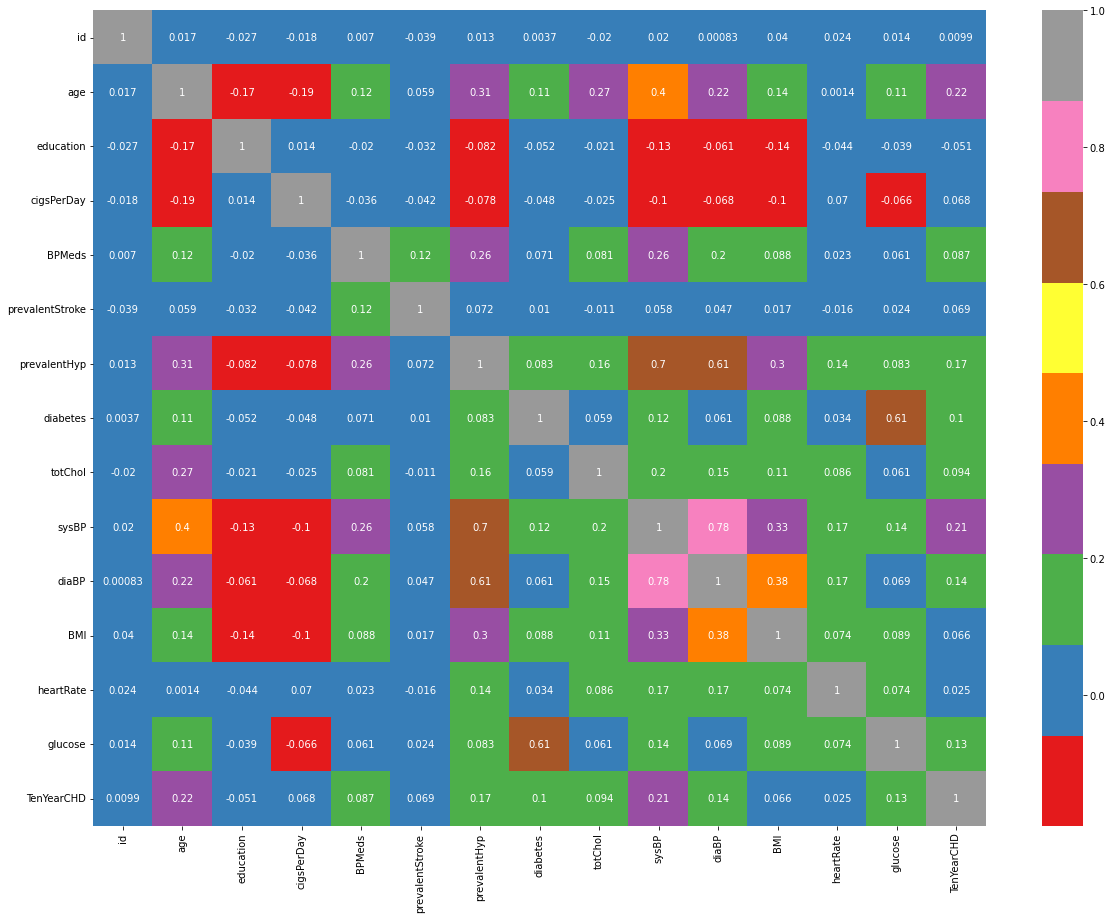

In [72]:
# Manipulate Features to minimize feature correlation and create new features
## Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [73]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#### 2. Feature Selection

In [74]:
# Select your features wisely to avoid overfitting
# calculating the vif by excluding some features which are not giving any information

In [75]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

,variables,VIF
0,age,40.955590
1,education,4.558650
2,cigsPerDay,1.625709
3,BPMeds,1.130394
4,prevalentStroke,1.026845
5,prevalentHyp,2.384344
6,diabetes,1.578033
7,totChol,30.528764
8,sysBP,133.149471
9,diaBP,128.018809


In [76]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','diaBP']]])

,variables,VIF
0,age,40.768590
1,education,4.451208
2,cigsPerDay,1.622740
3,BPMeds,1.128760
4,prevalentStroke,1.026609
5,prevalentHyp,2.383901
6,diabetes,1.566525
7,totChol,30.336222
8,sysBP,71.477548
9,BMI,39.020817


In [77]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','diaBP','sysBP']]])

,variables,VIF
0,age,33.980569
1,education,4.428765
2,cigsPerDay,1.618696
3,BPMeds,1.119939
4,prevalentStroke,1.026604
5,prevalentHyp,1.717436
6,diabetes,1.558545
7,totChol,29.826959
8,BMI,34.000904
9,heartRate,29.058126


In [78]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','diaBP','sysBP','totChol']]])

,variables,VIF
0,age,28.333052
1,education,4.361112
2,cigsPerDay,1.609924
3,BPMeds,1.119105
4,prevalentStroke,1.025714
5,prevalentHyp,1.715978
6,diabetes,1.555205
7,BMI,32.325980
8,heartRate,27.811674
9,glucose,19.711089


In [79]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','diaBP','sysBP','totChol','heartRate']]])

,variables,VIF
0,age,25.881102
1,education,4.271301
2,cigsPerDay,1.552918
3,BPMeds,1.118345
4,prevalentStroke,1.025237
5,prevalentHyp,1.715978
6,diabetes,1.519792
7,BMI,27.476183
8,glucose,18.497168


In [80]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','diaBP','sysBP','totChol','heartRate','glucose','BMI']]])

,variables,VIF
0,age,5.109500
1,education,3.948454
2,cigsPerDay,1.514709
3,BPMeds,1.117858
4,prevalentStroke,1.024793
5,prevalentHyp,1.682638
6,diabetes,1.044323


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Important features we have found are - **age, education, cigsPerDay,BPMeds, prevalentStroke.**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [82]:
numerical_var

NameError: ignored

KeyError: ignored

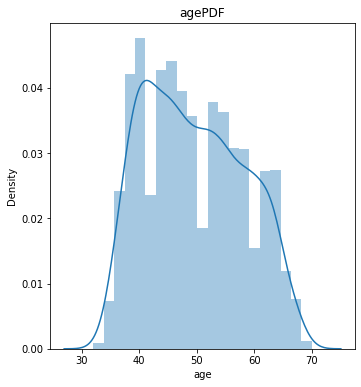

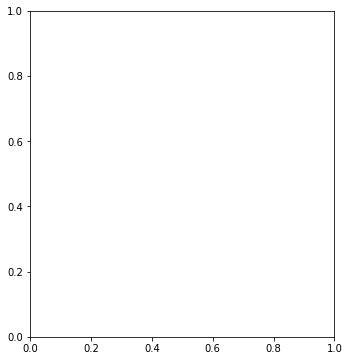

In [81]:
# Transform Your data

# Creating list for numerical features
num_col = ['age','cigsper_day']
     

# checking for distribution in continuous features
for col in num_col:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.distplot(df[col])
  plt.title(col+'PDF')

for col in num_col:
  plt.subplot(122)
  stats.probplot(df[col],dist='norm',plot=plt)
  plt.title(col+' QQ Plot')
  plt.show()

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***